In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def recaman(num, orig=0, start=1, skip=1):
    '''
    orig: the first number in the list
    start: size of the first jump
    skip: how mmuch the jump will increase each time
    '''
    lst = [orig]
    n = start
    while len(lst)<=num:
        #print(lst)
        yield lst[-1]
        if lst[-1]-n>=0 and lst[-1]-n not in lst:
            lst.append(lst[-1]-n)
        else:
            lst.append(lst[-1]+n)
        n = n + skip

def semicircle(mn, mx, n_segments=51):
    d = n_segments
    rev = mn > mx
    if rev:
        mn2 = mx
        mx = mn
        mn = mn2
    th = np.arange(np.pi, 0 - np.pi/d/2, -np.pi/d)
    c = (mn + mx)/2
    r = (mx - mn)/2
    x = np.zeros(th.shape)+10
    y = np.zeros(th.shape)+10
    for i in range(0, len(th)):
        #print(th[i], np.cos(th[i]), c+r*np.cos(th[i]))
        x[i] = c + r*np.cos(th[i])
        y[i] = r*np.sin(th[i])
    if rev:
        x = x[::-1]
        y = y[::-1]

    return x,y

def draw_recaman(n, orig=0, start=0, skip=1, scale=1, offset=0, stop_approx=False, remove_last=False,
                 new_plot=True, linewidth=1.5):
    r = list(recaman(max(n*4,30), orig=orig, start=start, skip=skip))
    if stop_approx:
        mx = np.zeros(len(r))
        mx_skip = np.zeros(len(r))
        for i in range(len(r)):
            mx[i] = np.max(r[:i+1])
        dff = np.diff(mx)>2
        dff[:n-1] = False
        last_chosen = np.where(dff)[0][0]-1
        if remove_last:
            r = r[:min(last_chosen+1, len(r))]
        else:
            r = r[:min(last_chosen+2, len(r))]
    else:
        r = r[:n]
    n = len(r)-1
    flip = -1
    x = np.zeros((0))
    y = np.zeros((0))
    for i in range(0,n):
        nx, ny = semicircle(r[i], r[i+1])
        x = np.concatenate((x, nx))
        y = np.concatenate((y, flip * ny))
        flip = -flip
    x = x*scale+offset
    y = y*scale
    if new_plot:
        plt.figure(figsize=(12,6))
    plt.plot(x,y, zorder=10000000-n, linewidth=linewidth)
    plt.axis('equal')
    plt.axis('off')
    return n+1

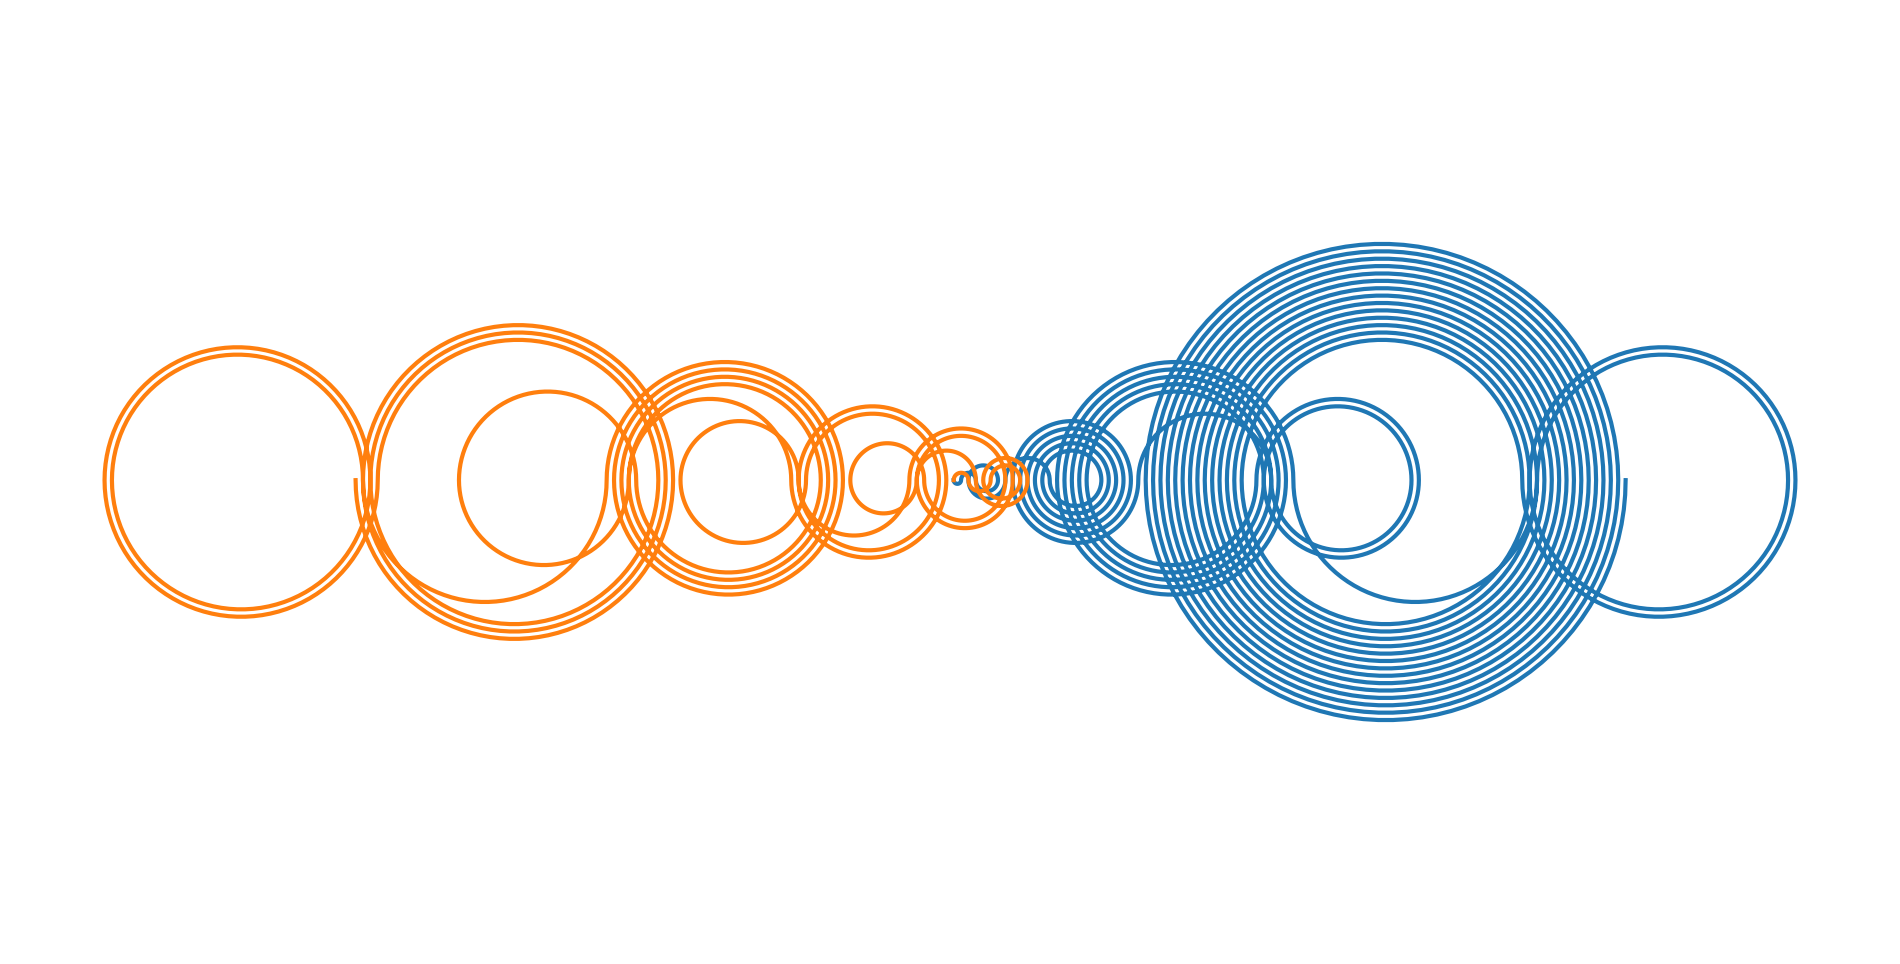

In [46]:
n = draw_recaman(65, orig=0, offset=0, start=1, skip=1, stop_approx=True)
n = draw_recaman(40, orig=10, start=2, skip=1, stop_approx=True, scale=-1, offset=10, new_plot=False)
plt.savefig('examples/r65,40.pdf')

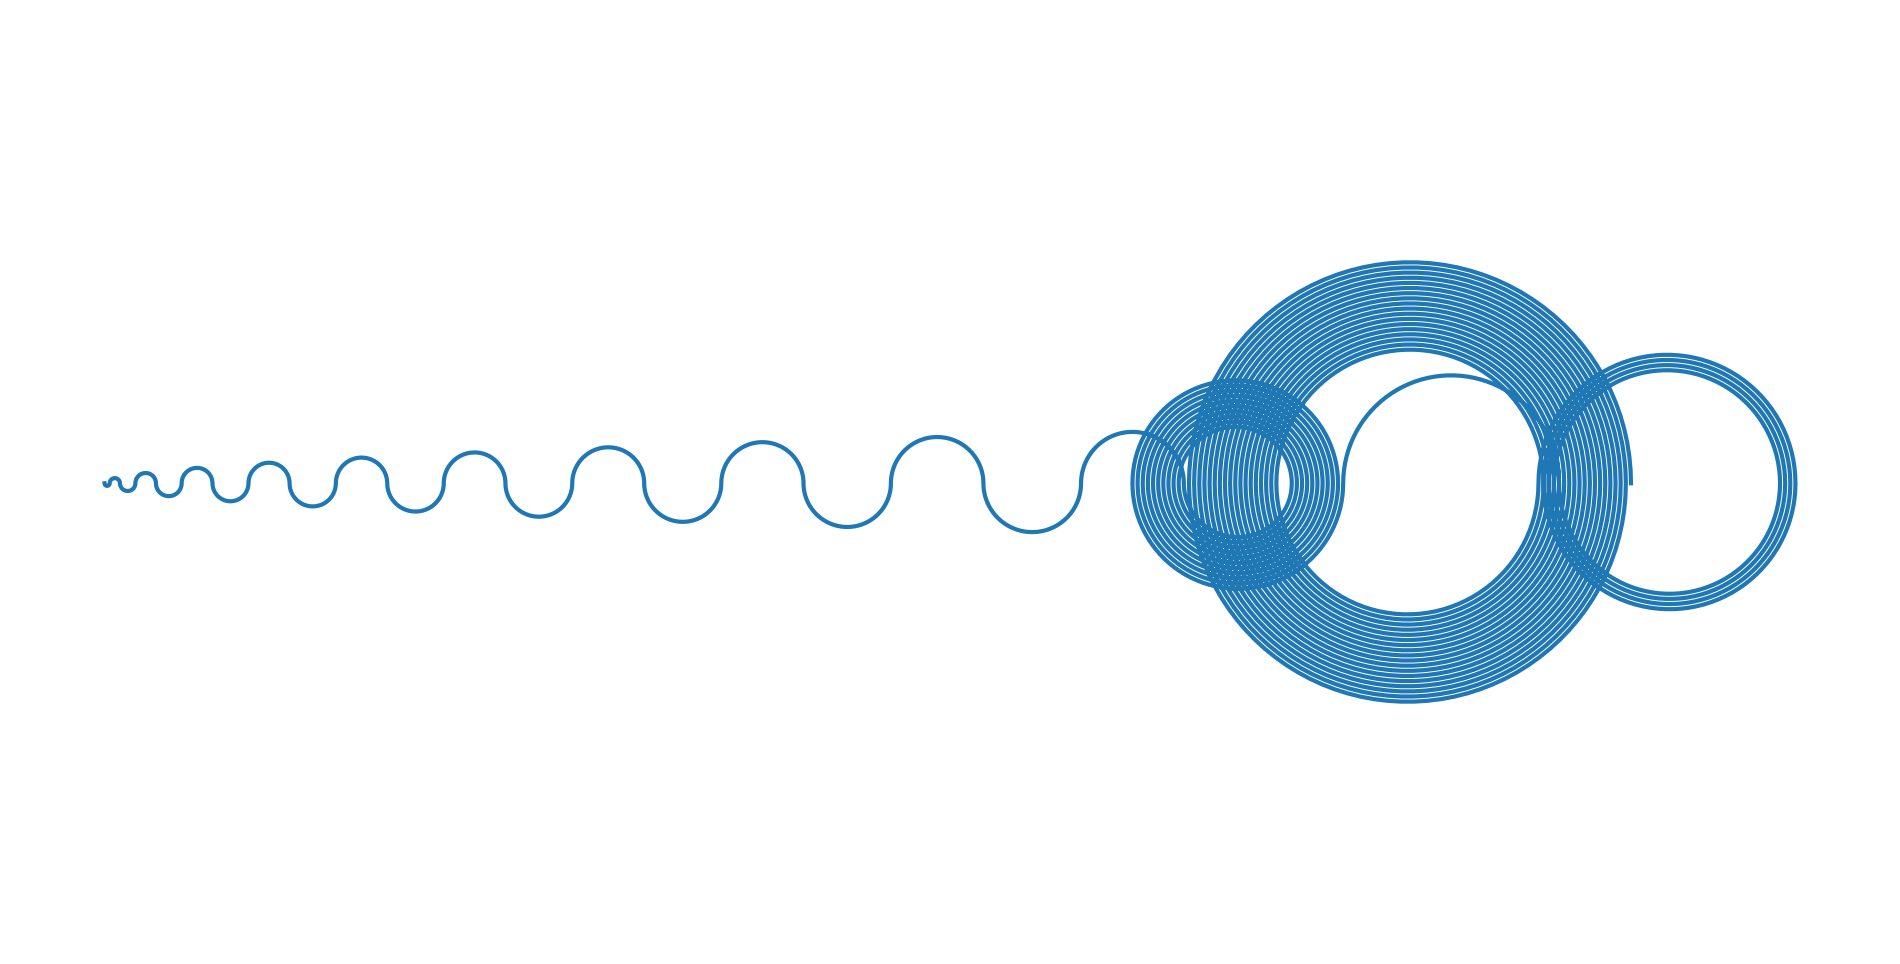

In [47]:
n = draw_recaman(80, orig=-200, offset=0, start=1, skip=1, stop_approx=True)
plt.savefig('examples/r80,-200,0,1,1.pdf')

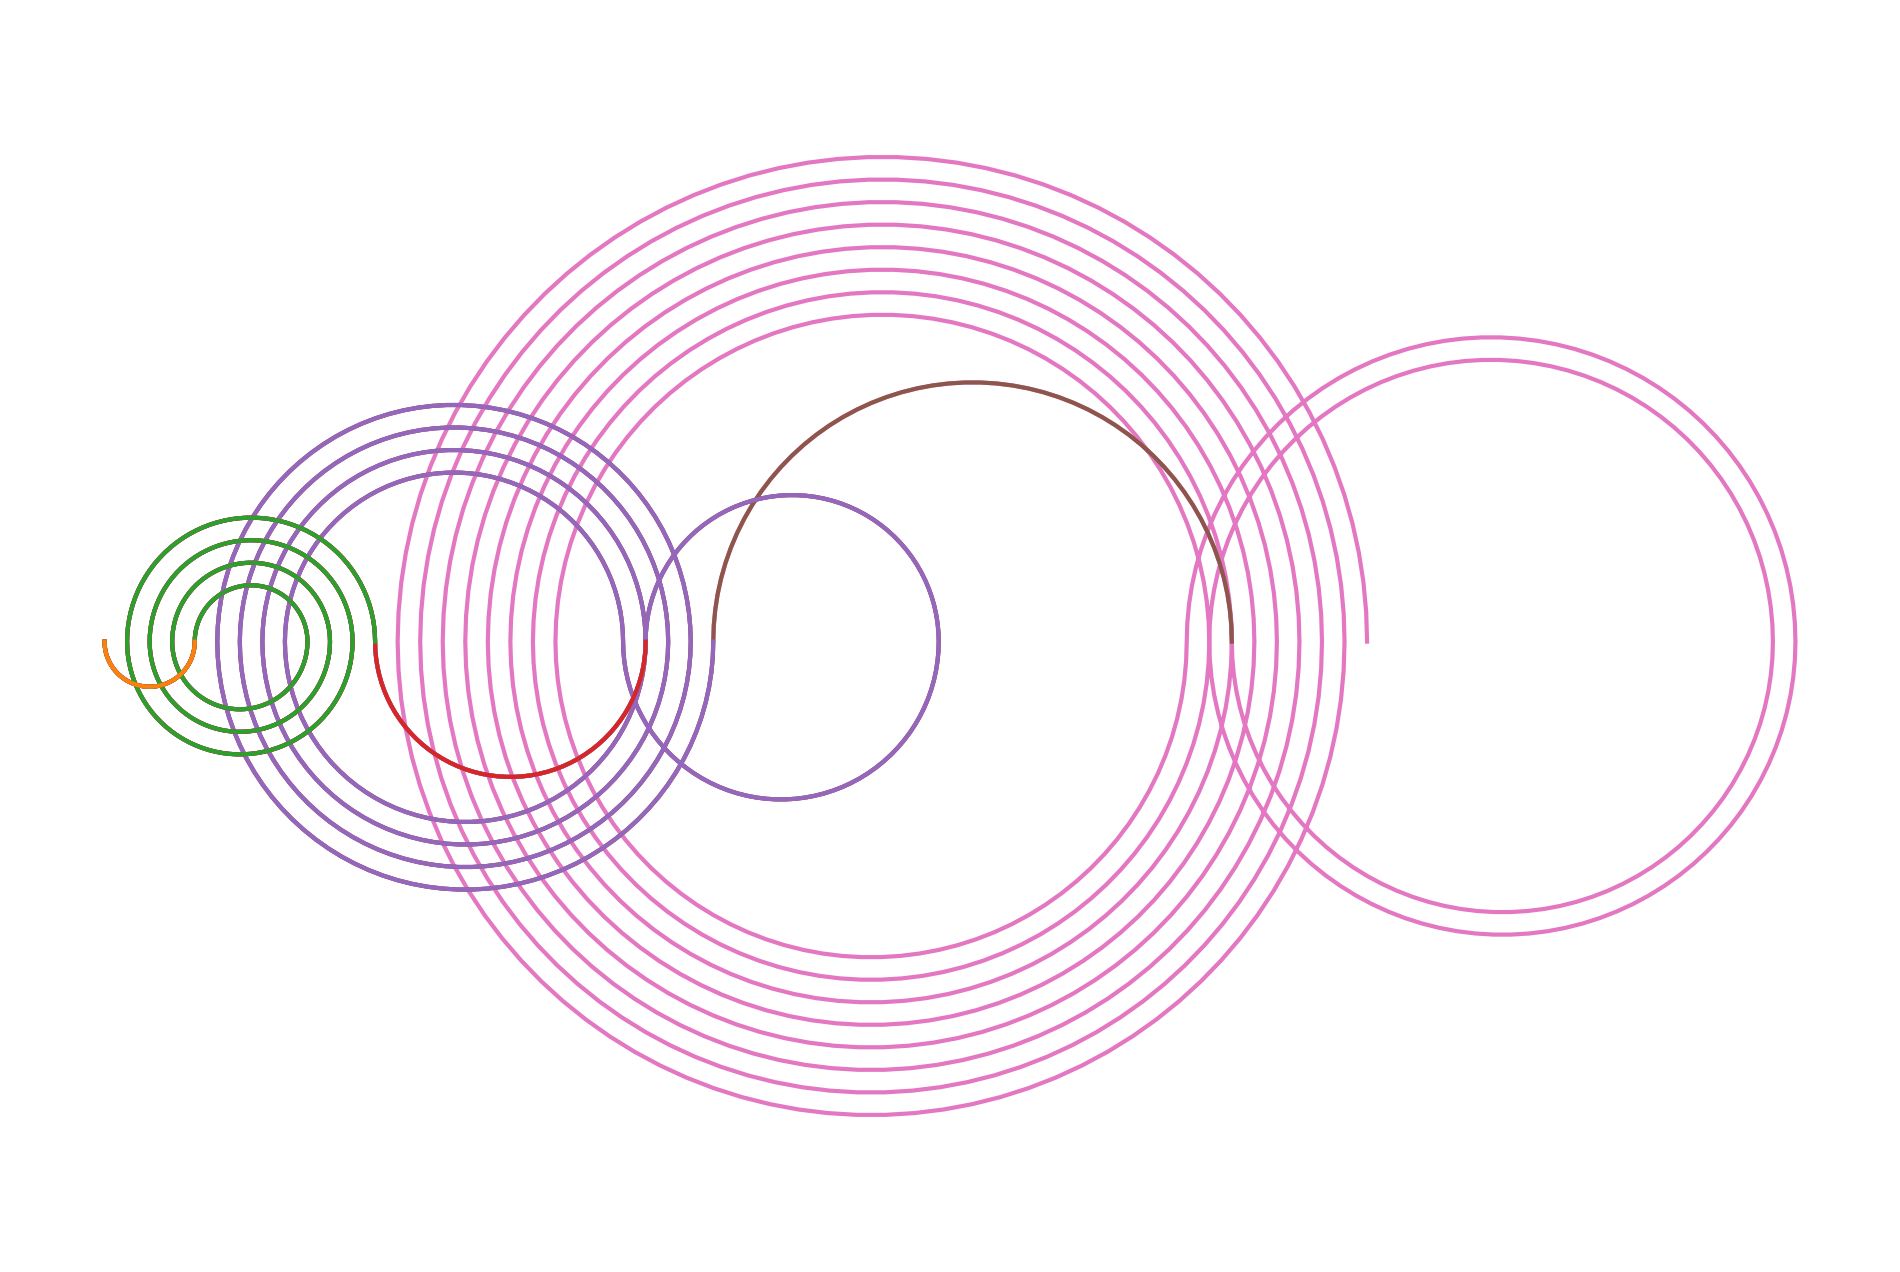

In [36]:
plt.figure(figsize=(12,8))
n = 1
while n<29:
    n = draw_recaman(n, start=4, stop_approx=True, new_plot=False)
    n = n + 1

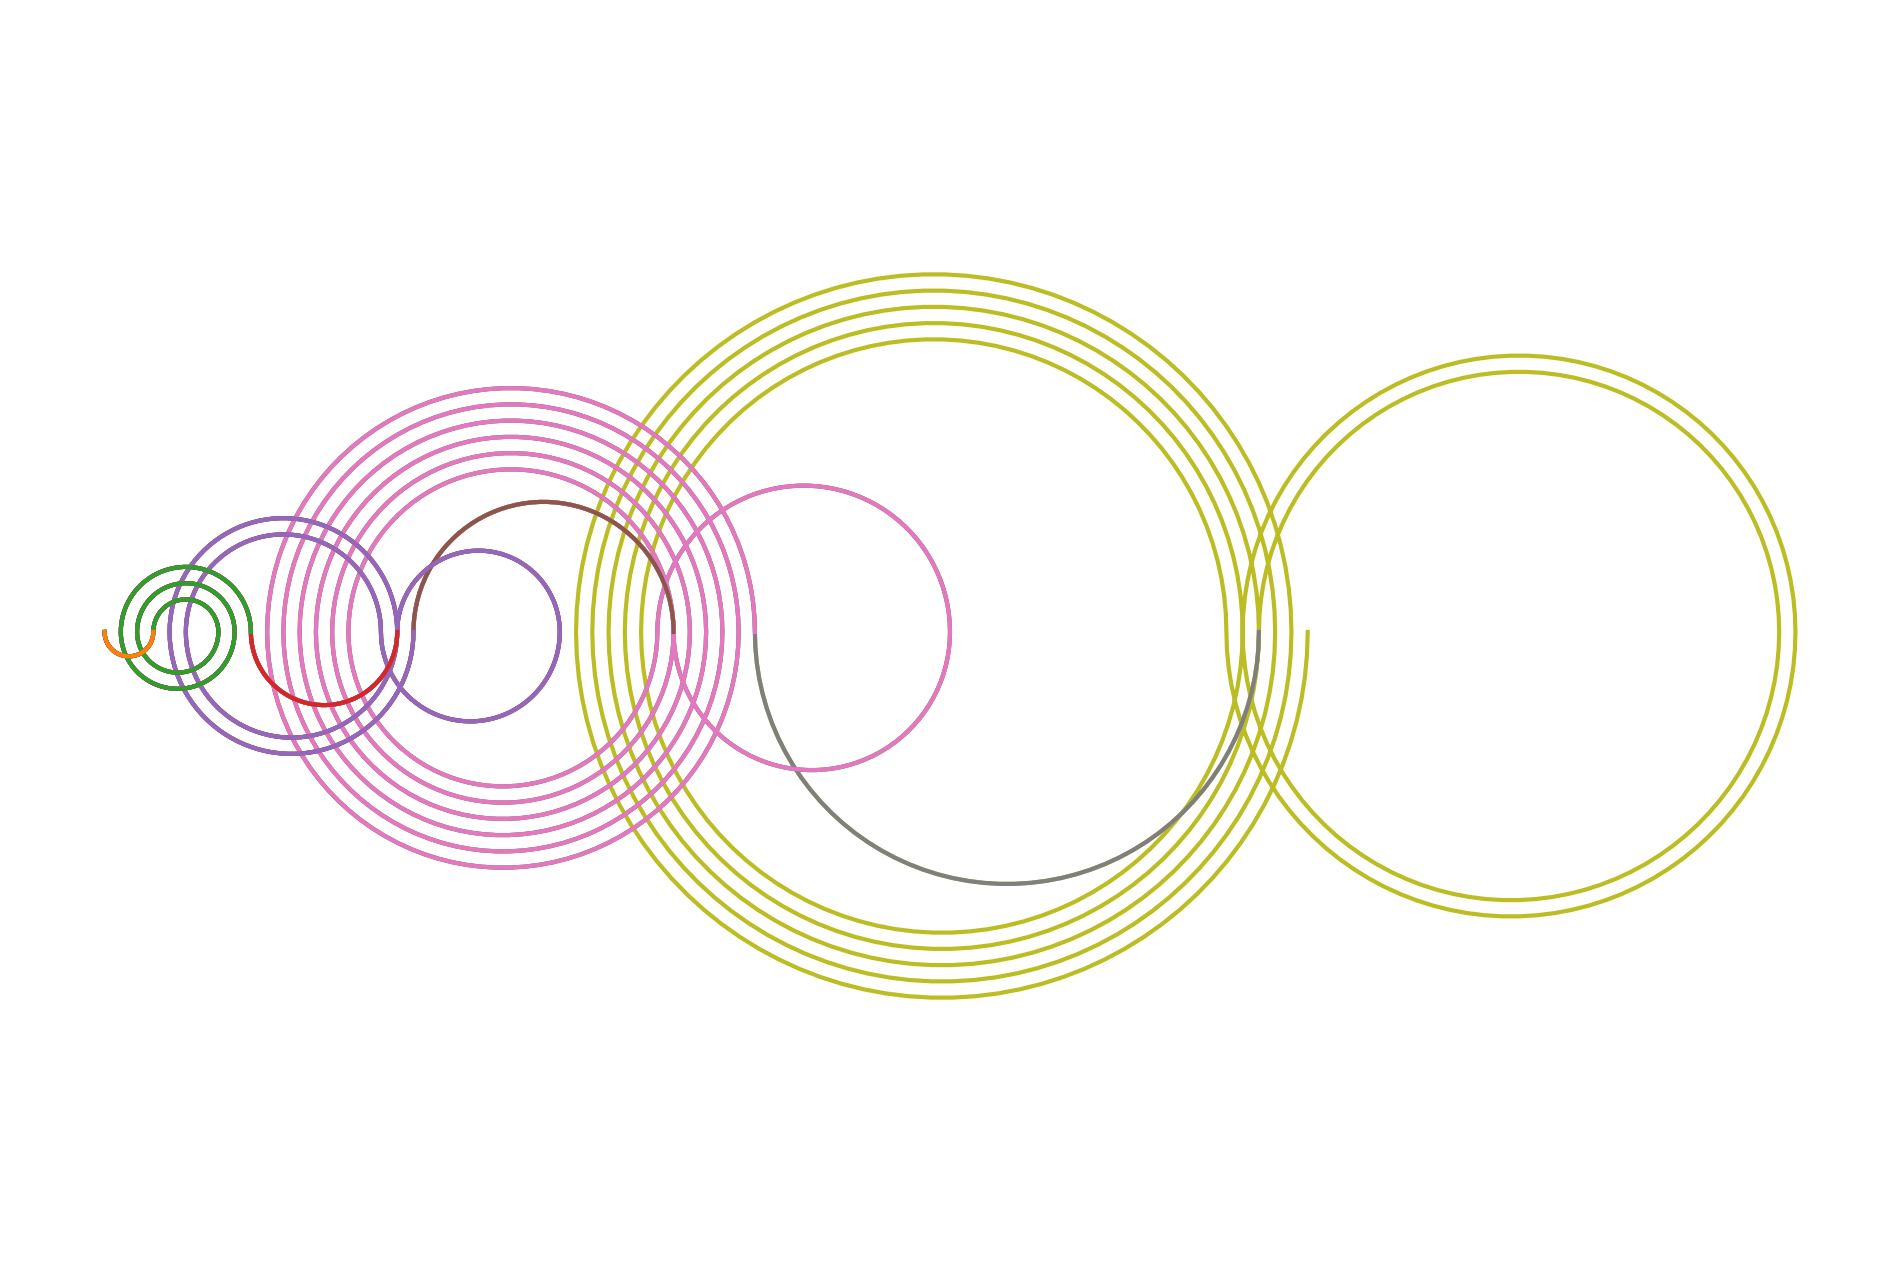

In [37]:
plt.figure(figsize=(12,8))
n = 1
while n<44:
    n = draw_recaman(n, start=3, stop_approx=True, new_plot=False)
    n = n + 1

1
2
9
10
20
21
41
42
66


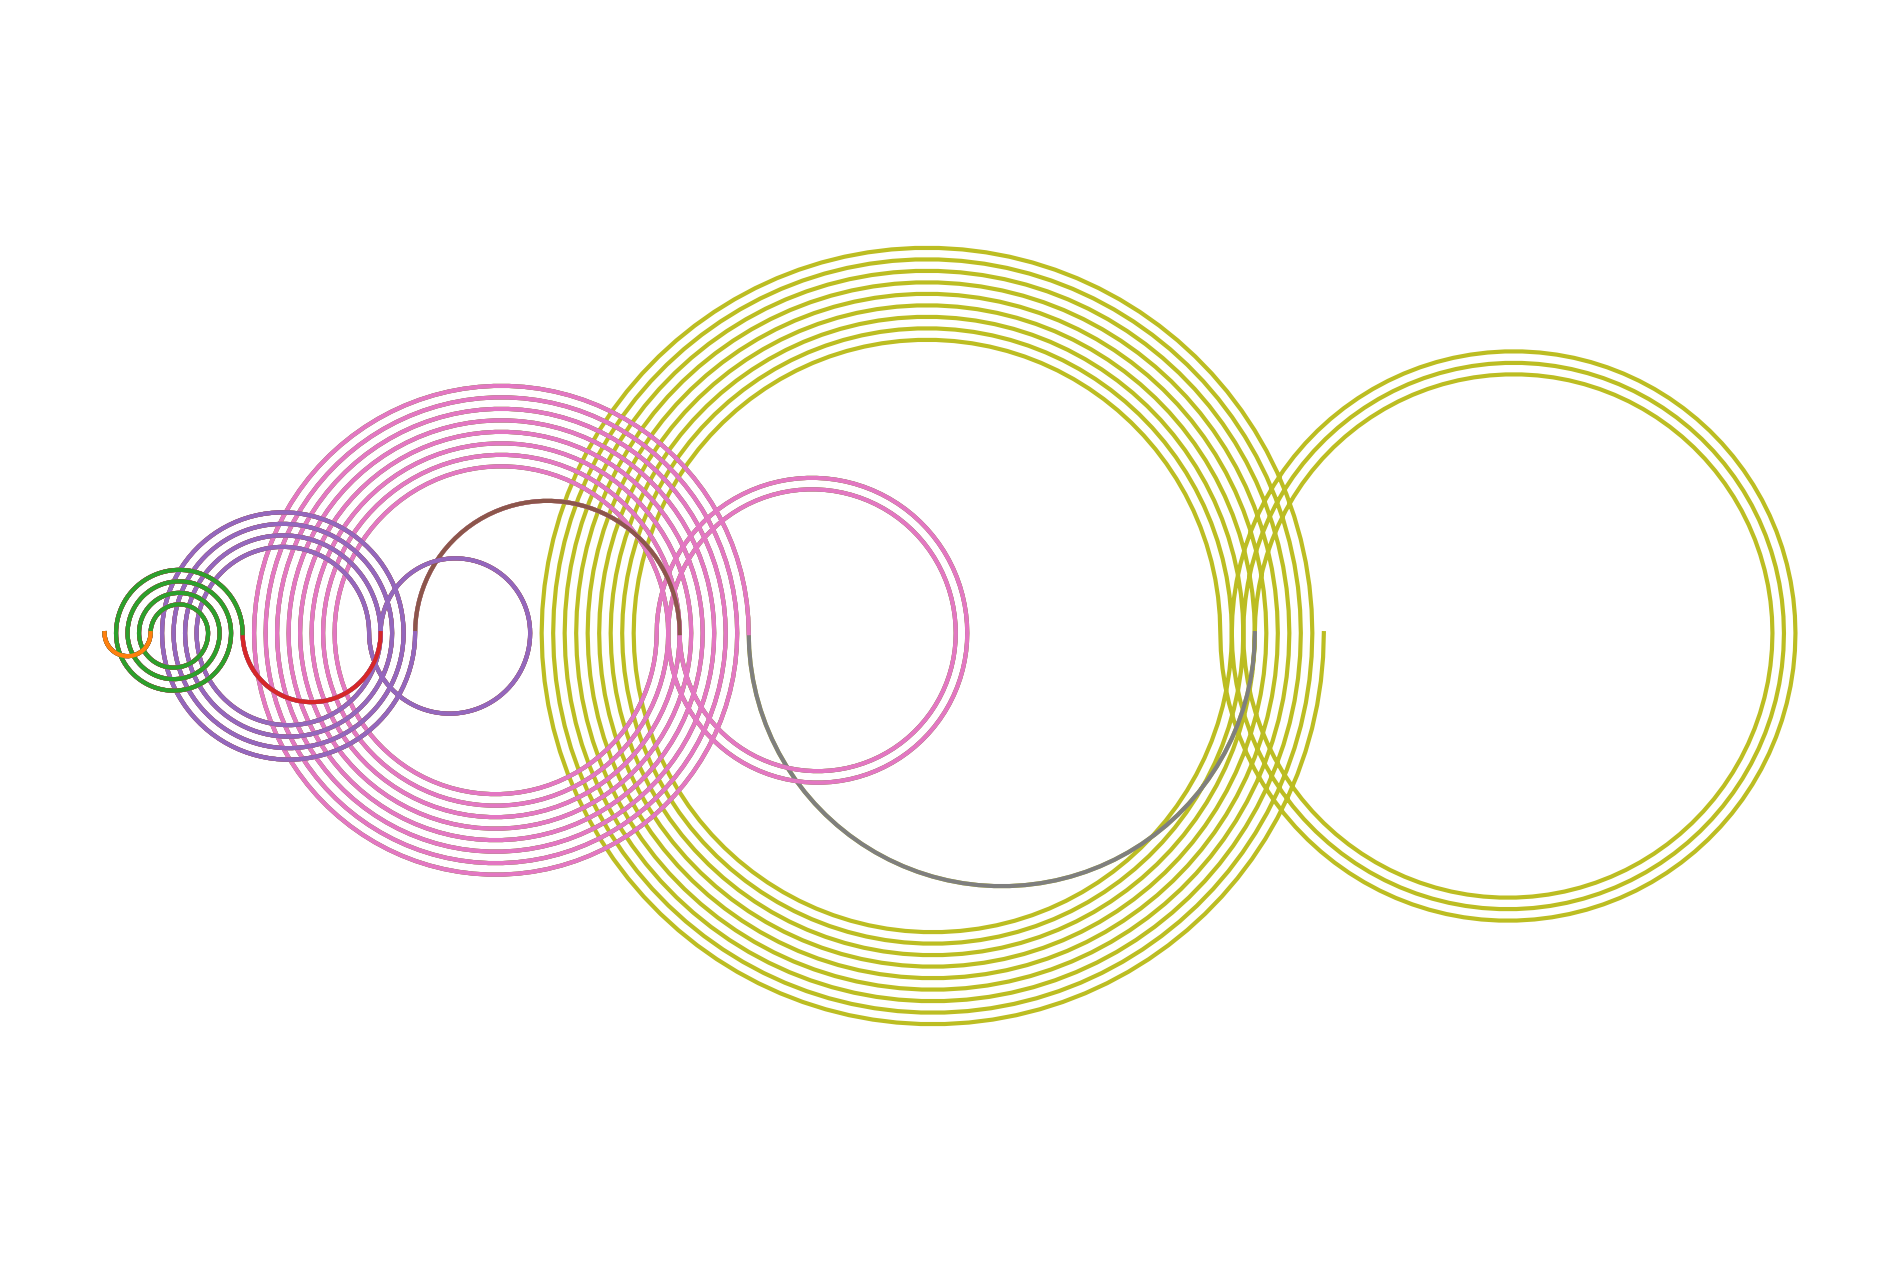

In [38]:
plt.figure(figsize=(12,8))
n = 1
while n<66:
    n = draw_recaman(n, start=4, stop_approx=True, new_plot=False)
    print(n)
    n = n + 1

32
32
52


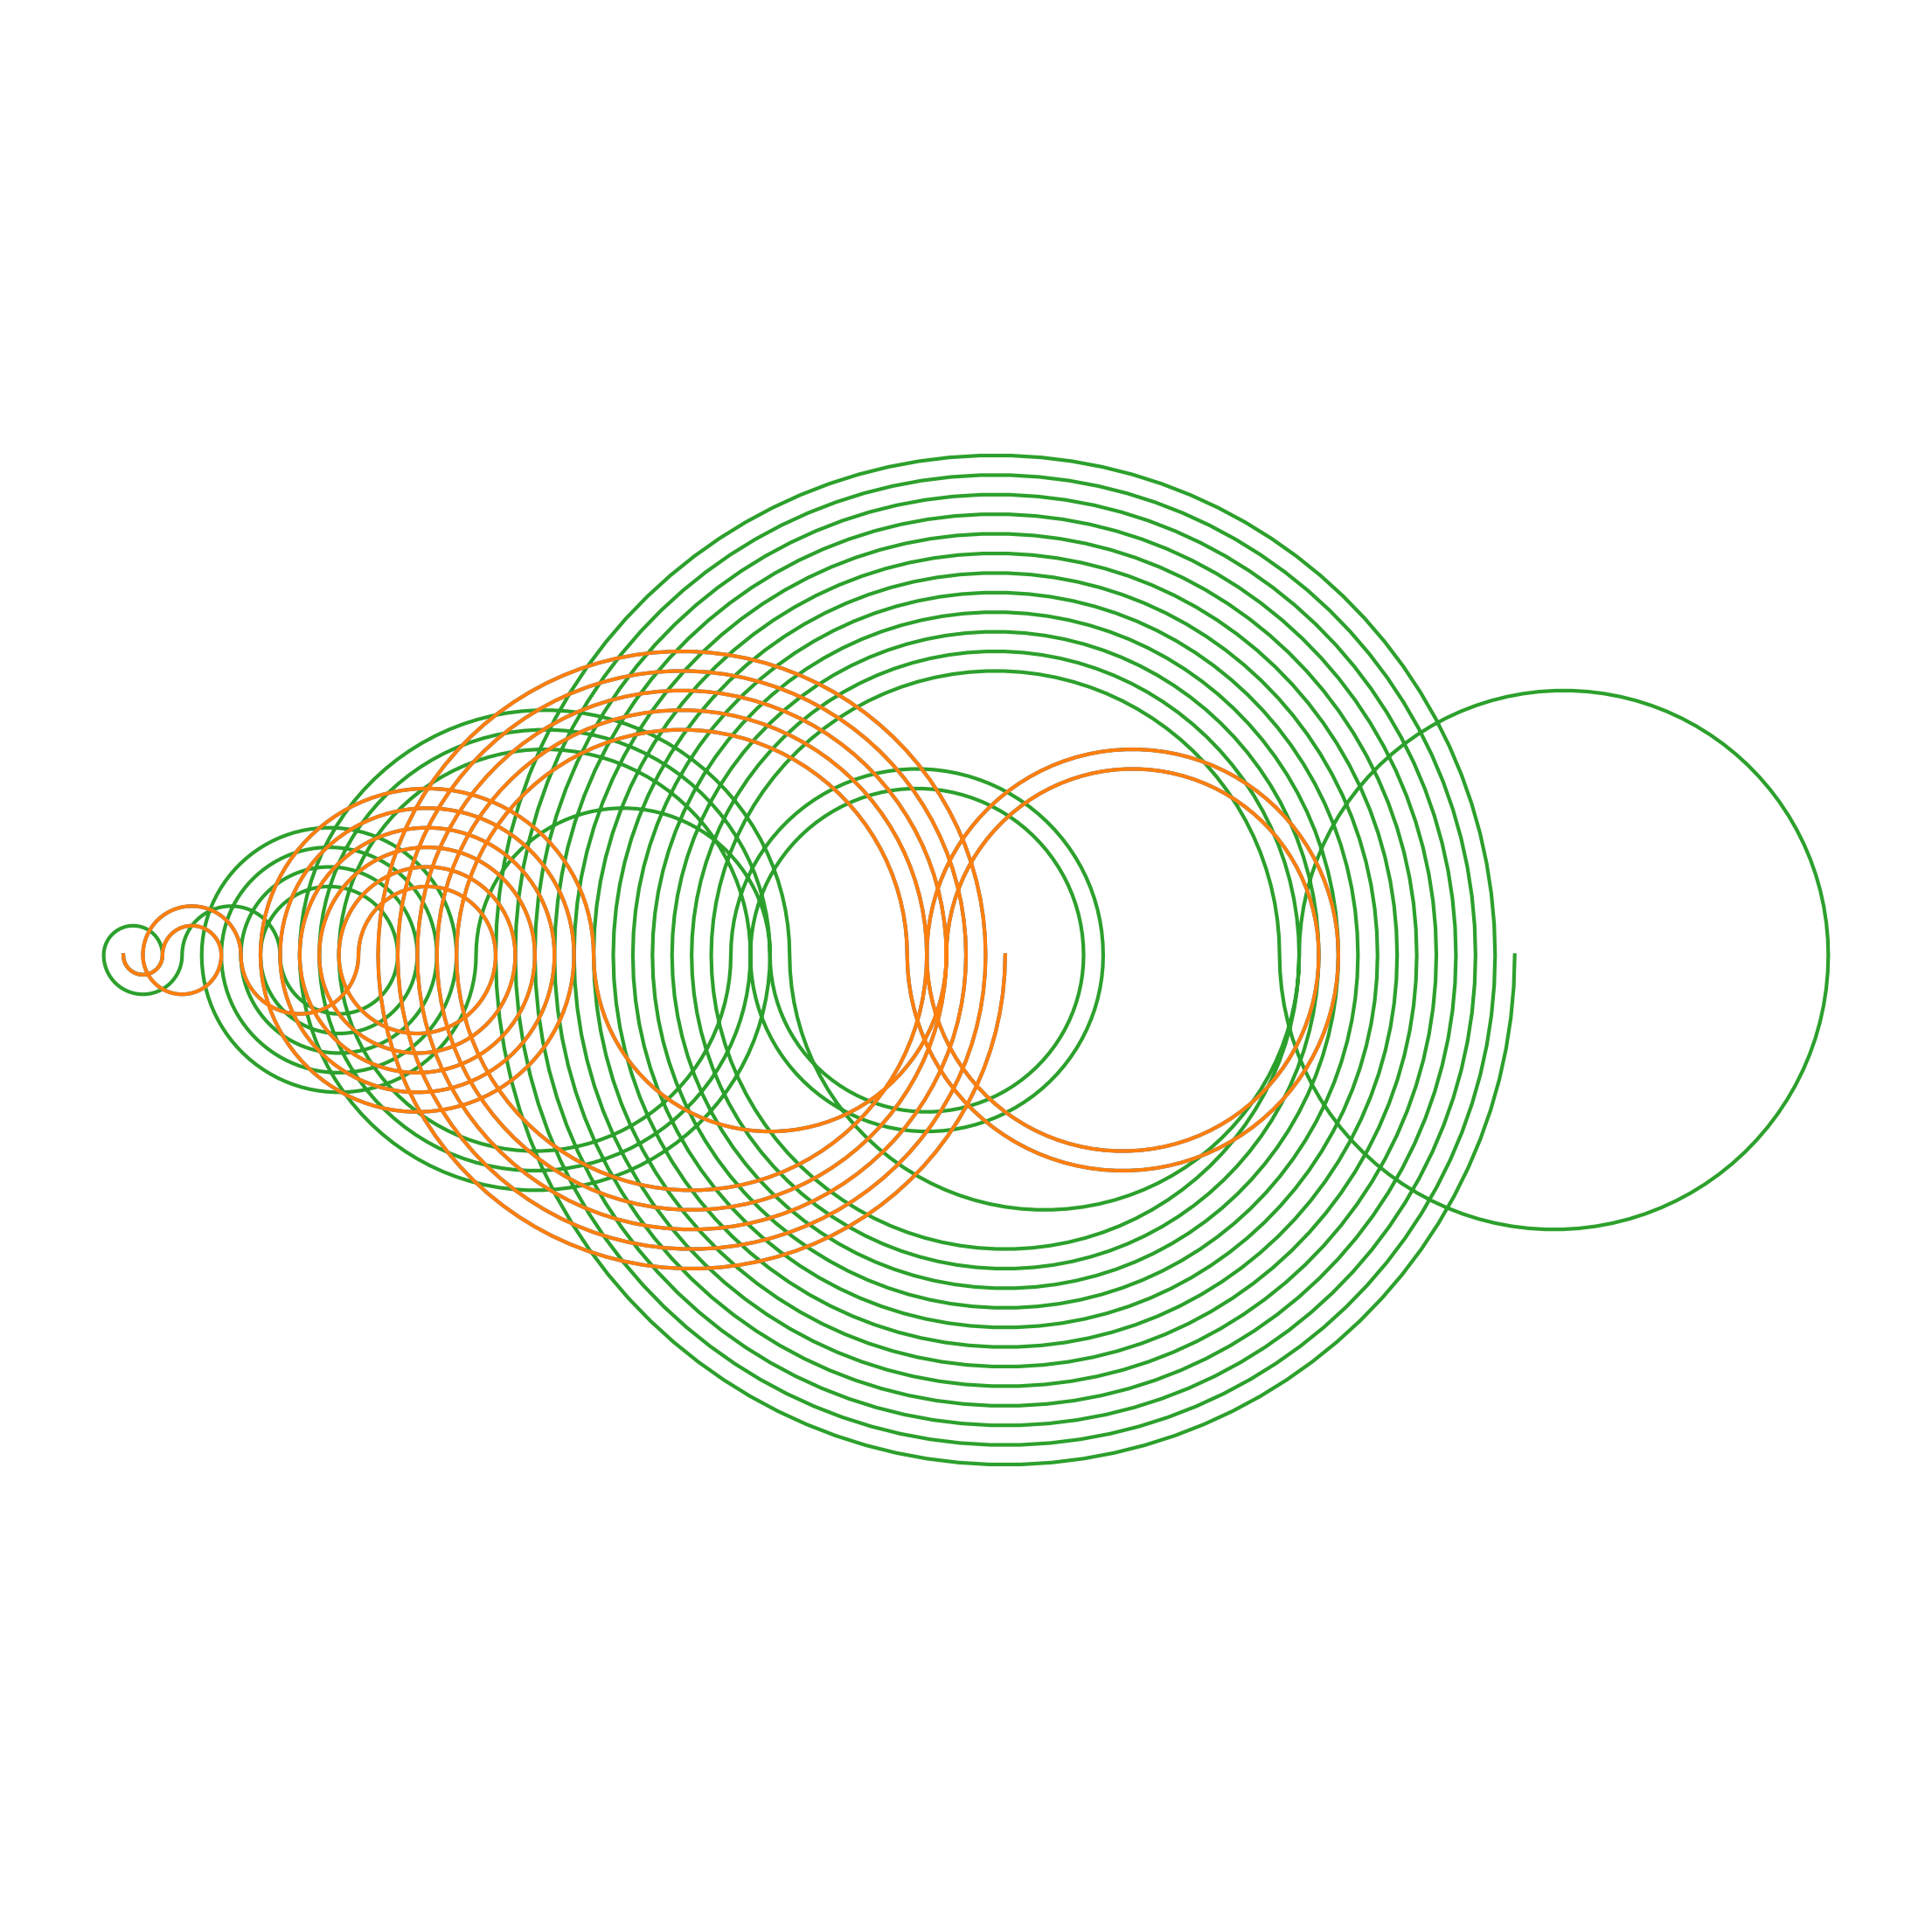

In [39]:
plt.figure(figsize=(14,14))
n = draw_recaman(30, offset=0, start=4, skip=2, stop_approx=True, new_plot=False)
print(n)
n = draw_recaman(30, orig=1, start=4, skip=2, stop_approx=True, offset=-1, new_plot=False)
print(n)
n = draw_recaman(30, orig=2, start=4, skip=2, stop_approx=True, offset=-2, new_plot=False)
print(n)

32
32
52
52


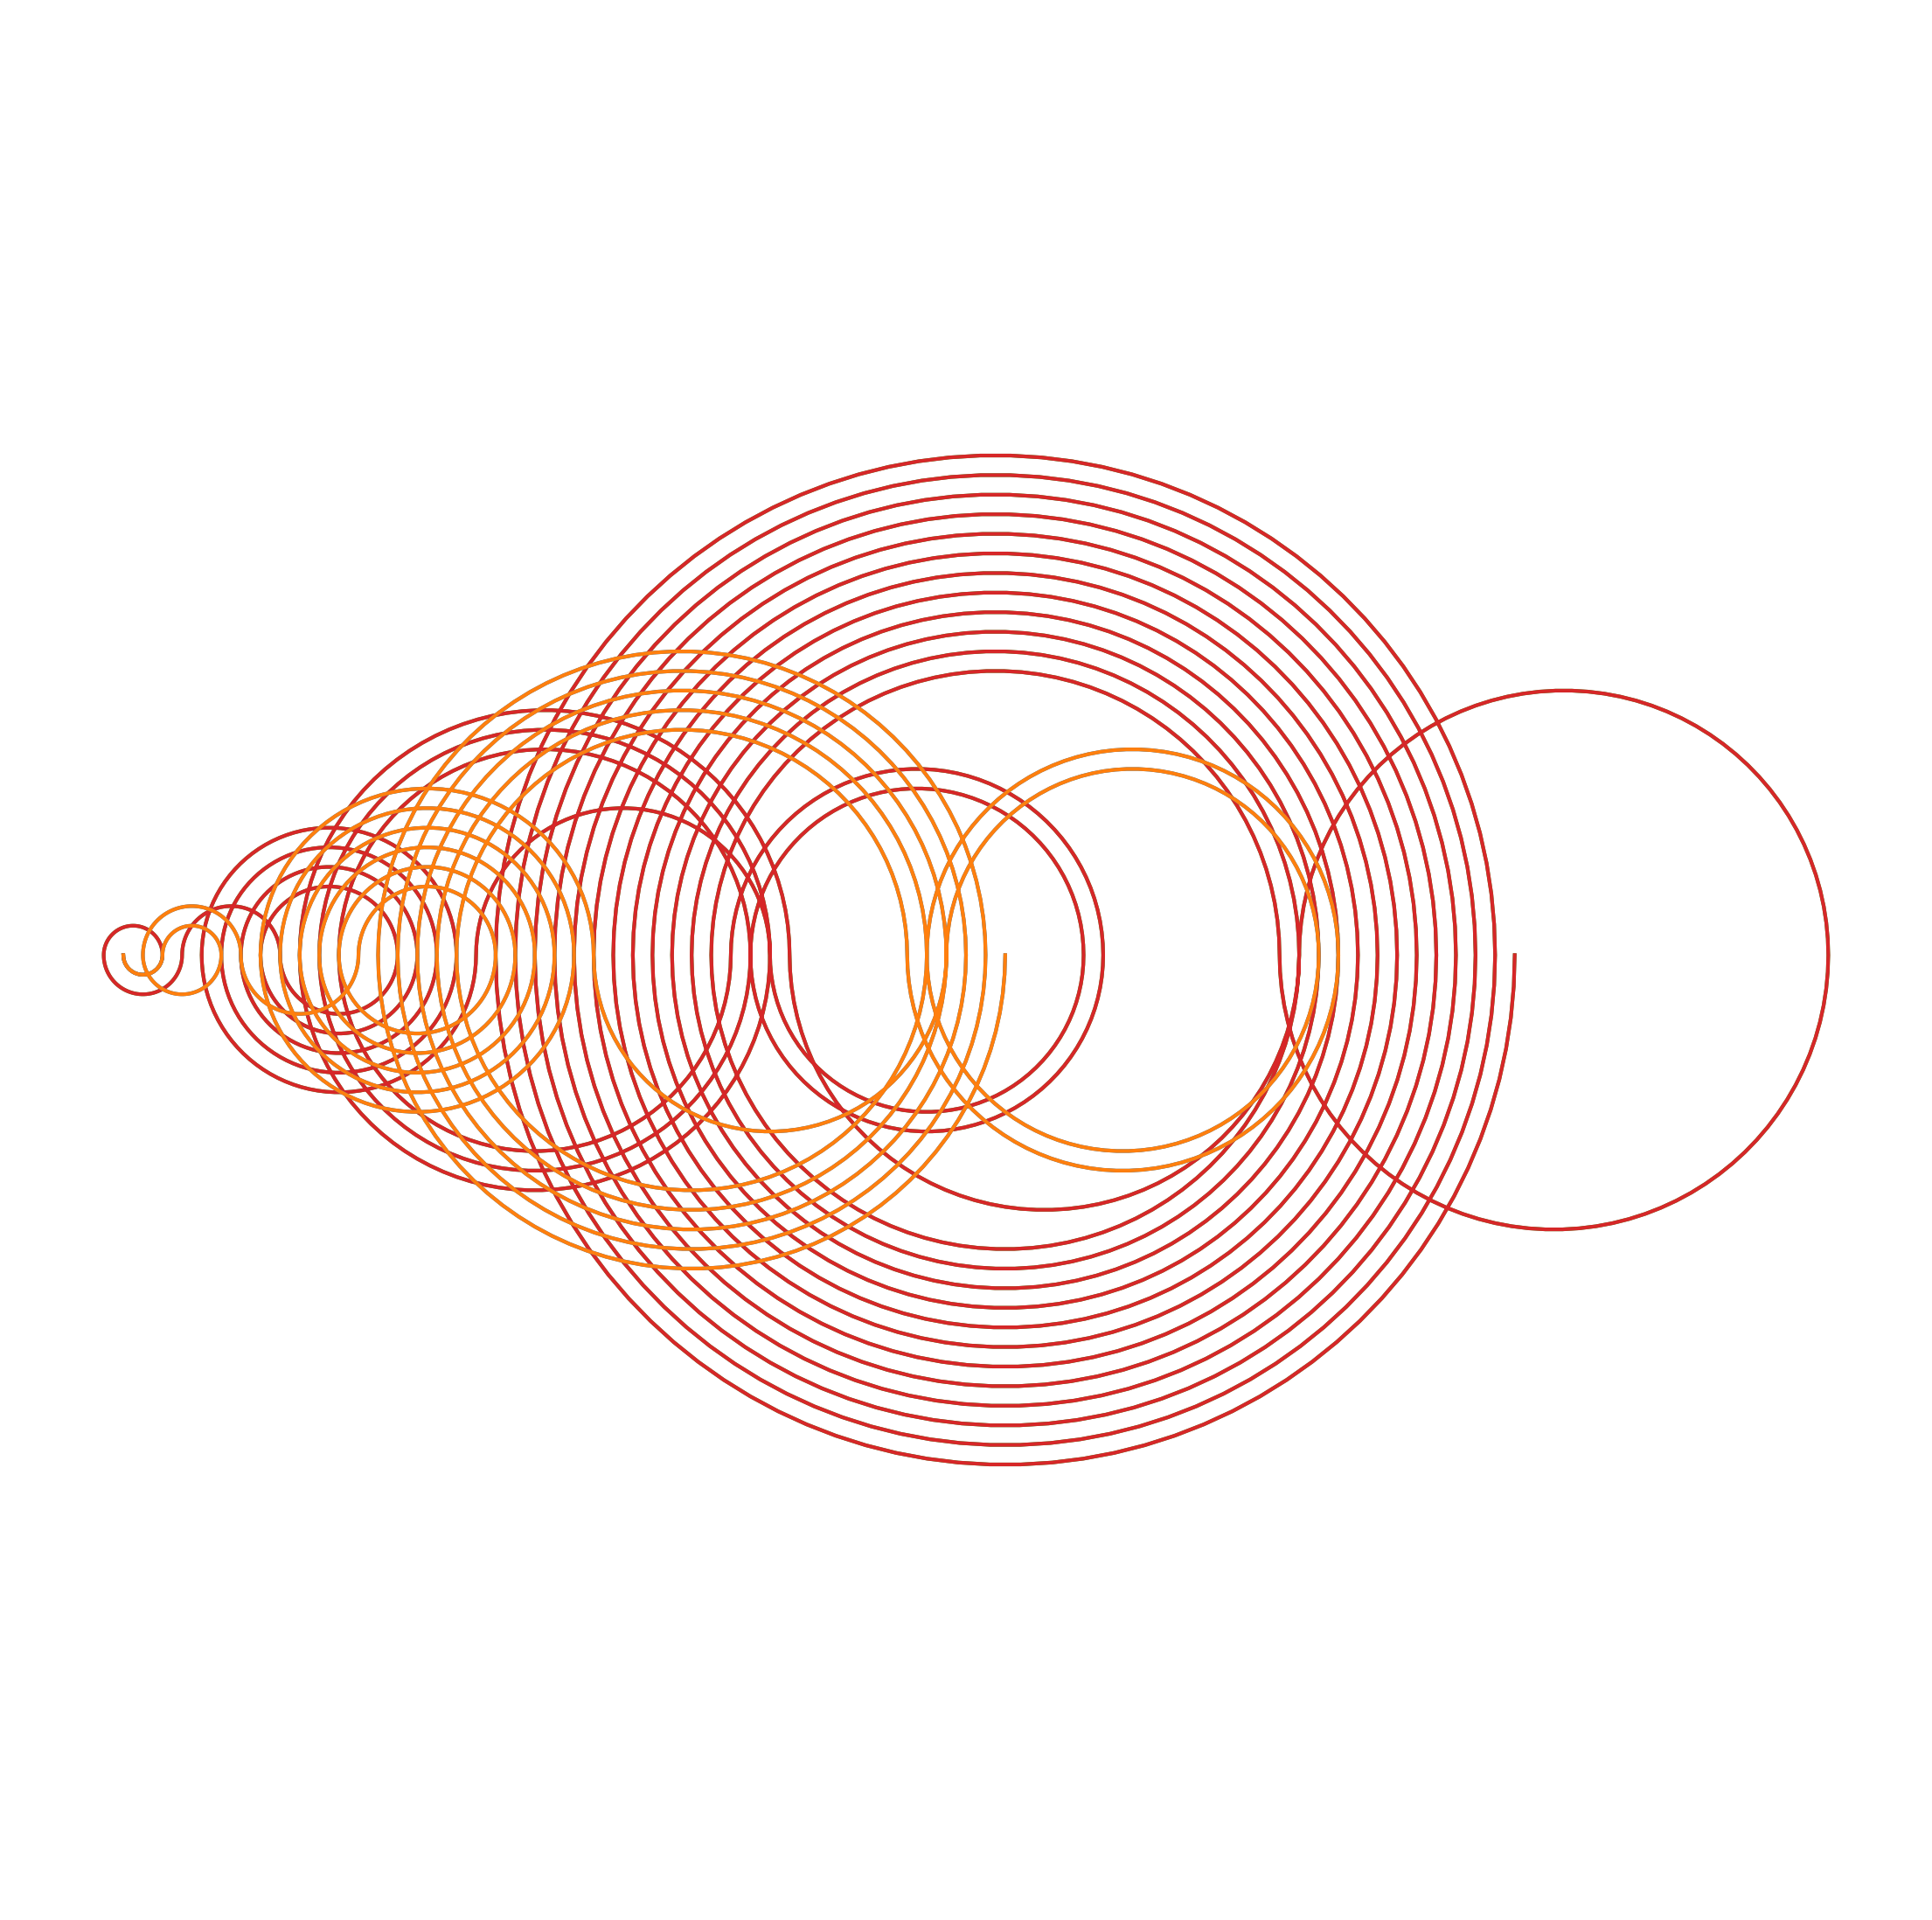

In [40]:
plt.figure(figsize=(14,14))
n = draw_recaman(30, offset=0, start=4, skip=2, stop_approx=True, new_plot=False)
print(n)
n = draw_recaman(30, orig=1, start=4, skip=2, stop_approx=True, offset=-1, new_plot=False)
print(n)
n = draw_recaman(30, orig=2, start=4, skip=2, stop_approx=True, offset=-2, new_plot=False)
print(n)
n = draw_recaman(30, orig=3, start=4, skip=2, stop_approx=True, offset=-3, new_plot=False)
print(n)

41


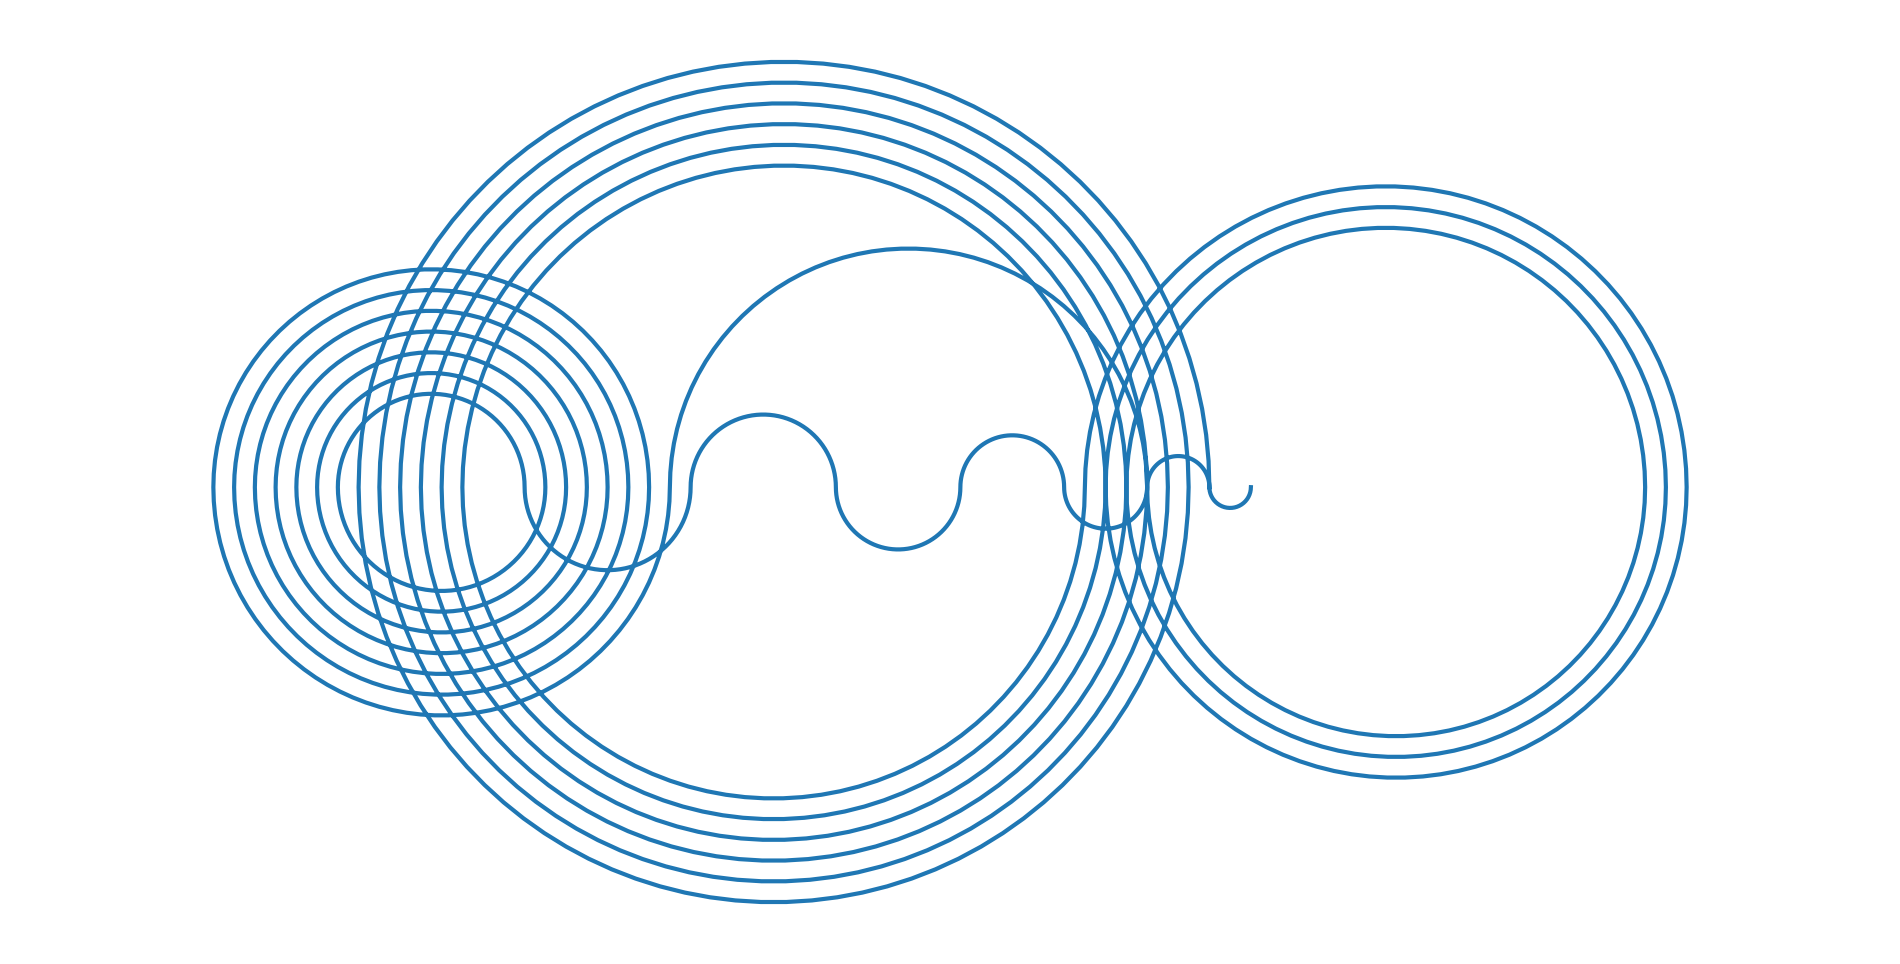

In [41]:
org = 50
n = draw_recaman(30, orig=org, offset=org, start=2, skip=1, stop_approx=True)
print(n)


41
23


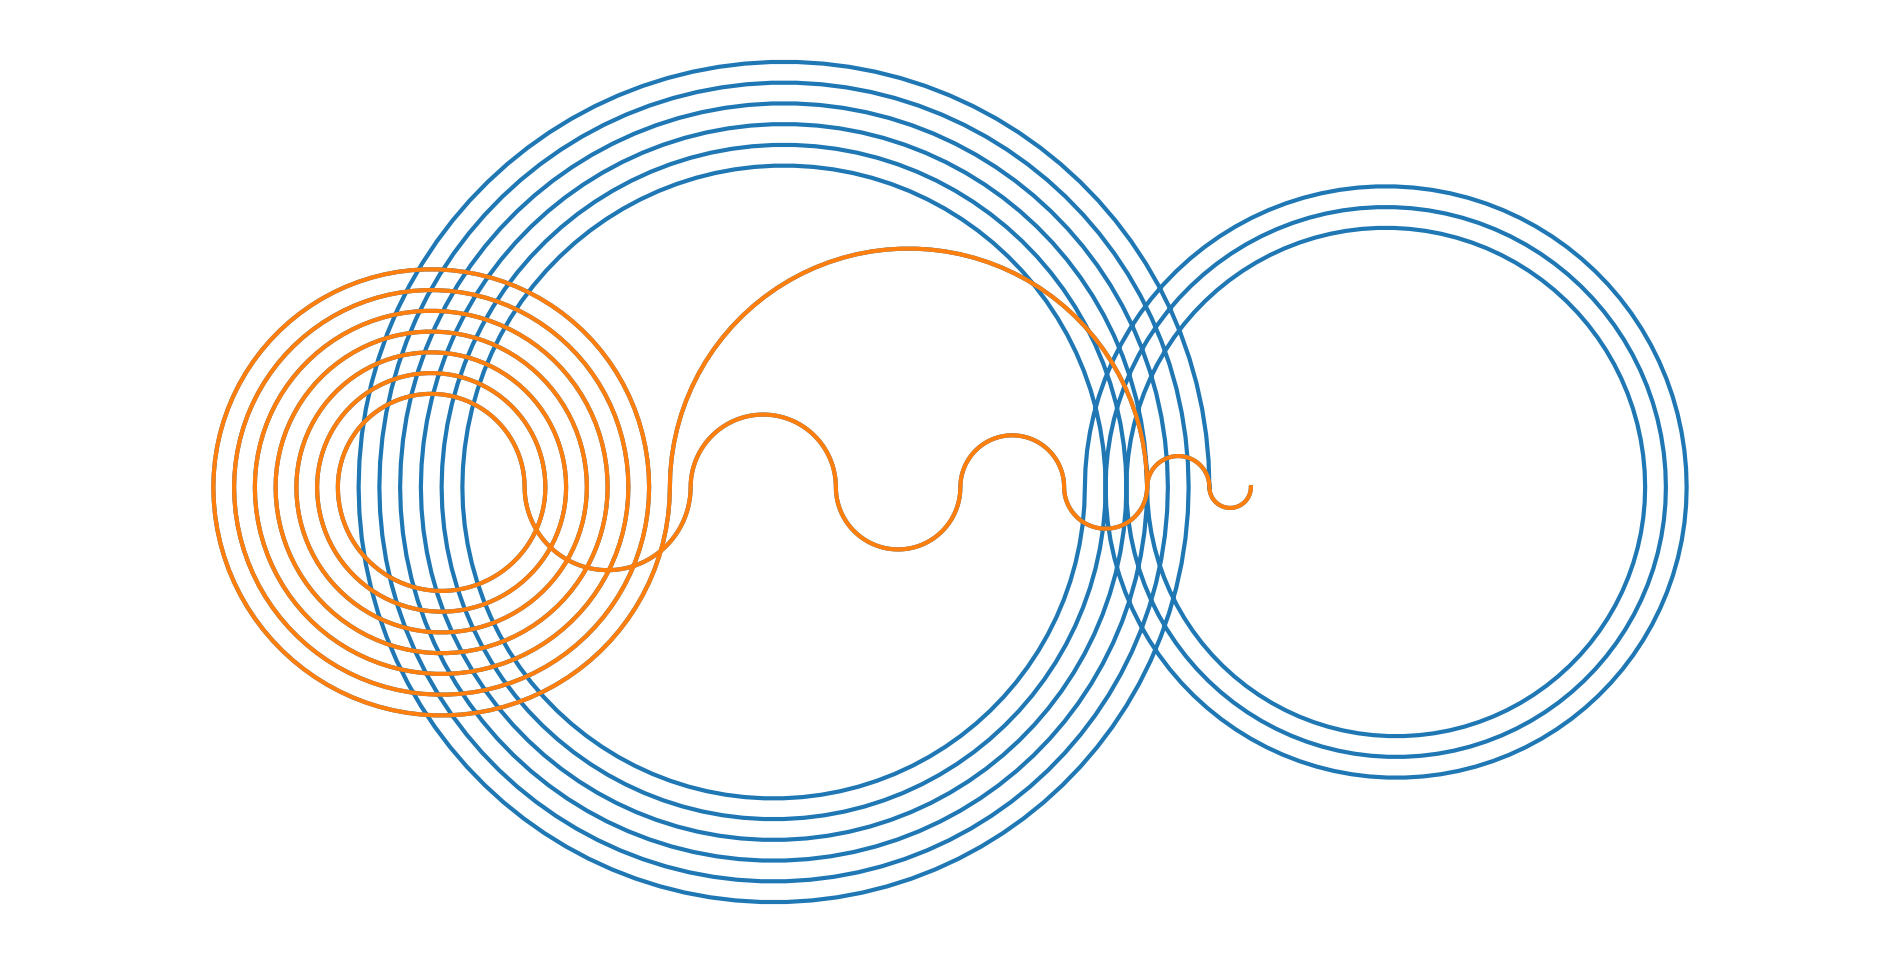

In [42]:
org = 50
n = draw_recaman(30, orig=org, offset=org, start=2, skip=1, stop_approx=True)
print(n)
n = draw_recaman(20, orig=org, offset=org, start=2, skip=1, stop_approx=True, new_plot=False)
print(n)

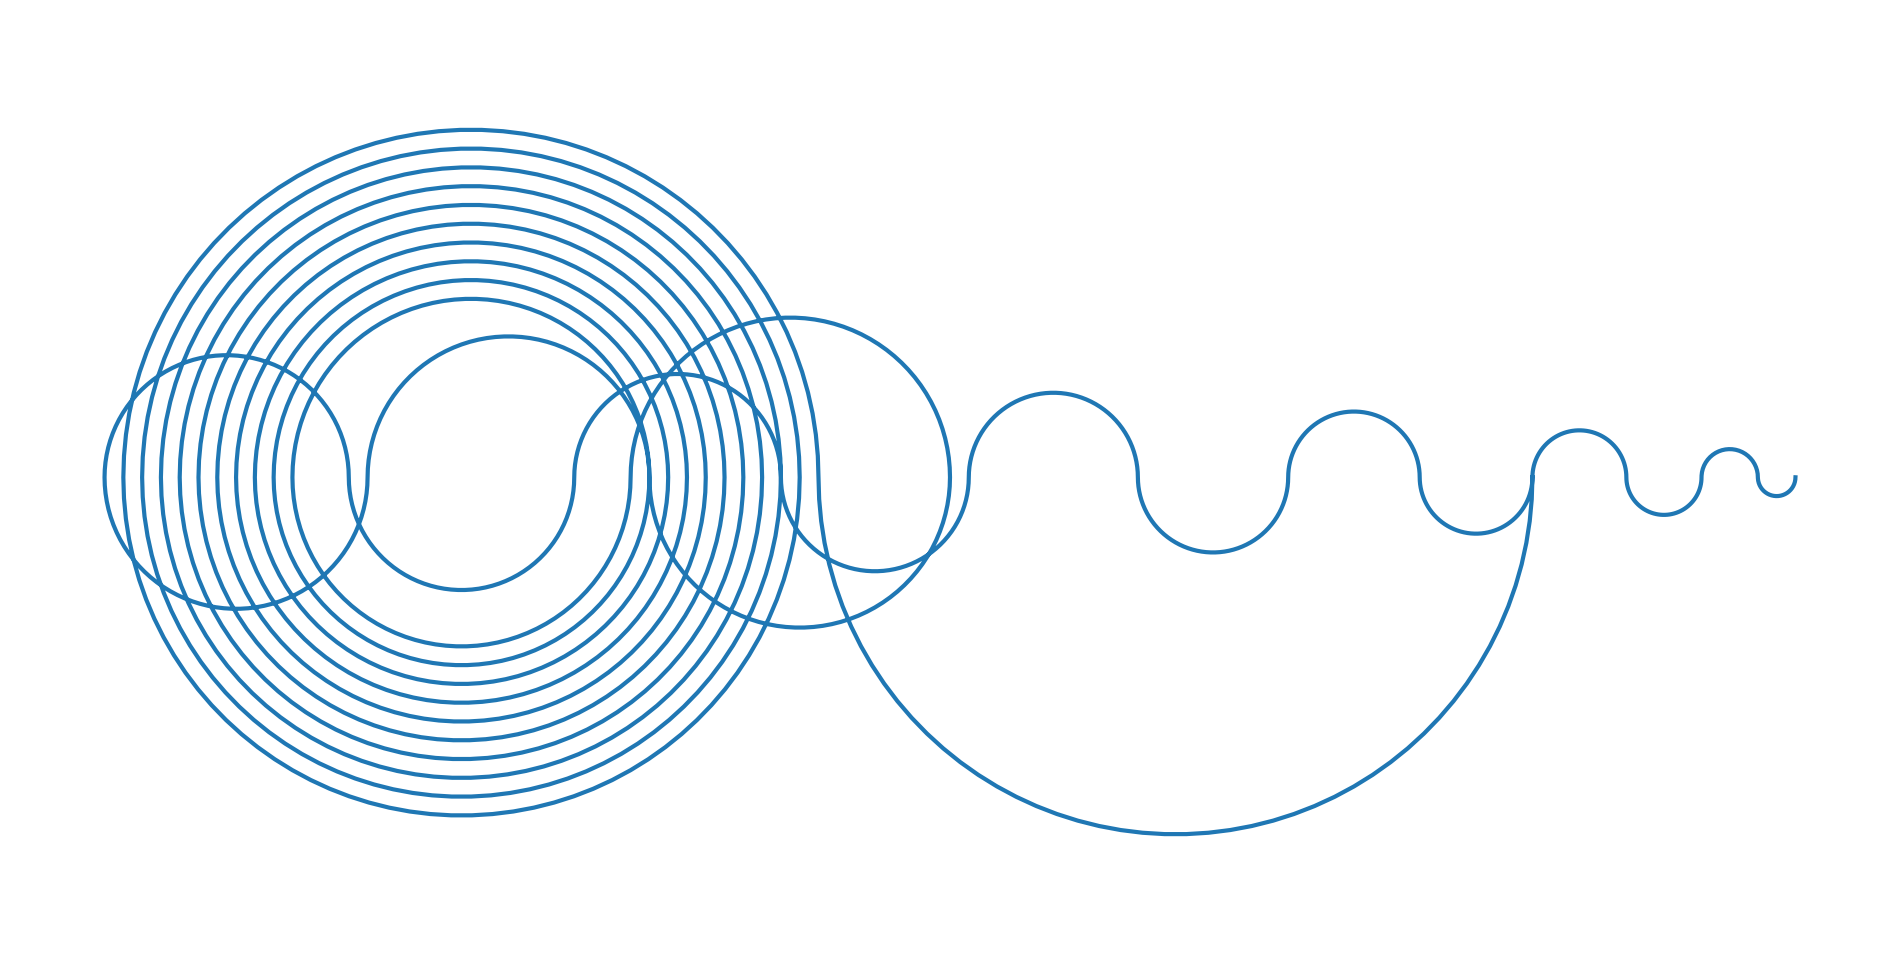

In [43]:
org = 90
# n = draw_recaman(30, orig=org, offset=org, start=1, skip=1, stop_approx=True)
# print(n)
n = draw_recaman(20, orig=org, offset=org, start=2, skip=1, stop_approx=True)

42


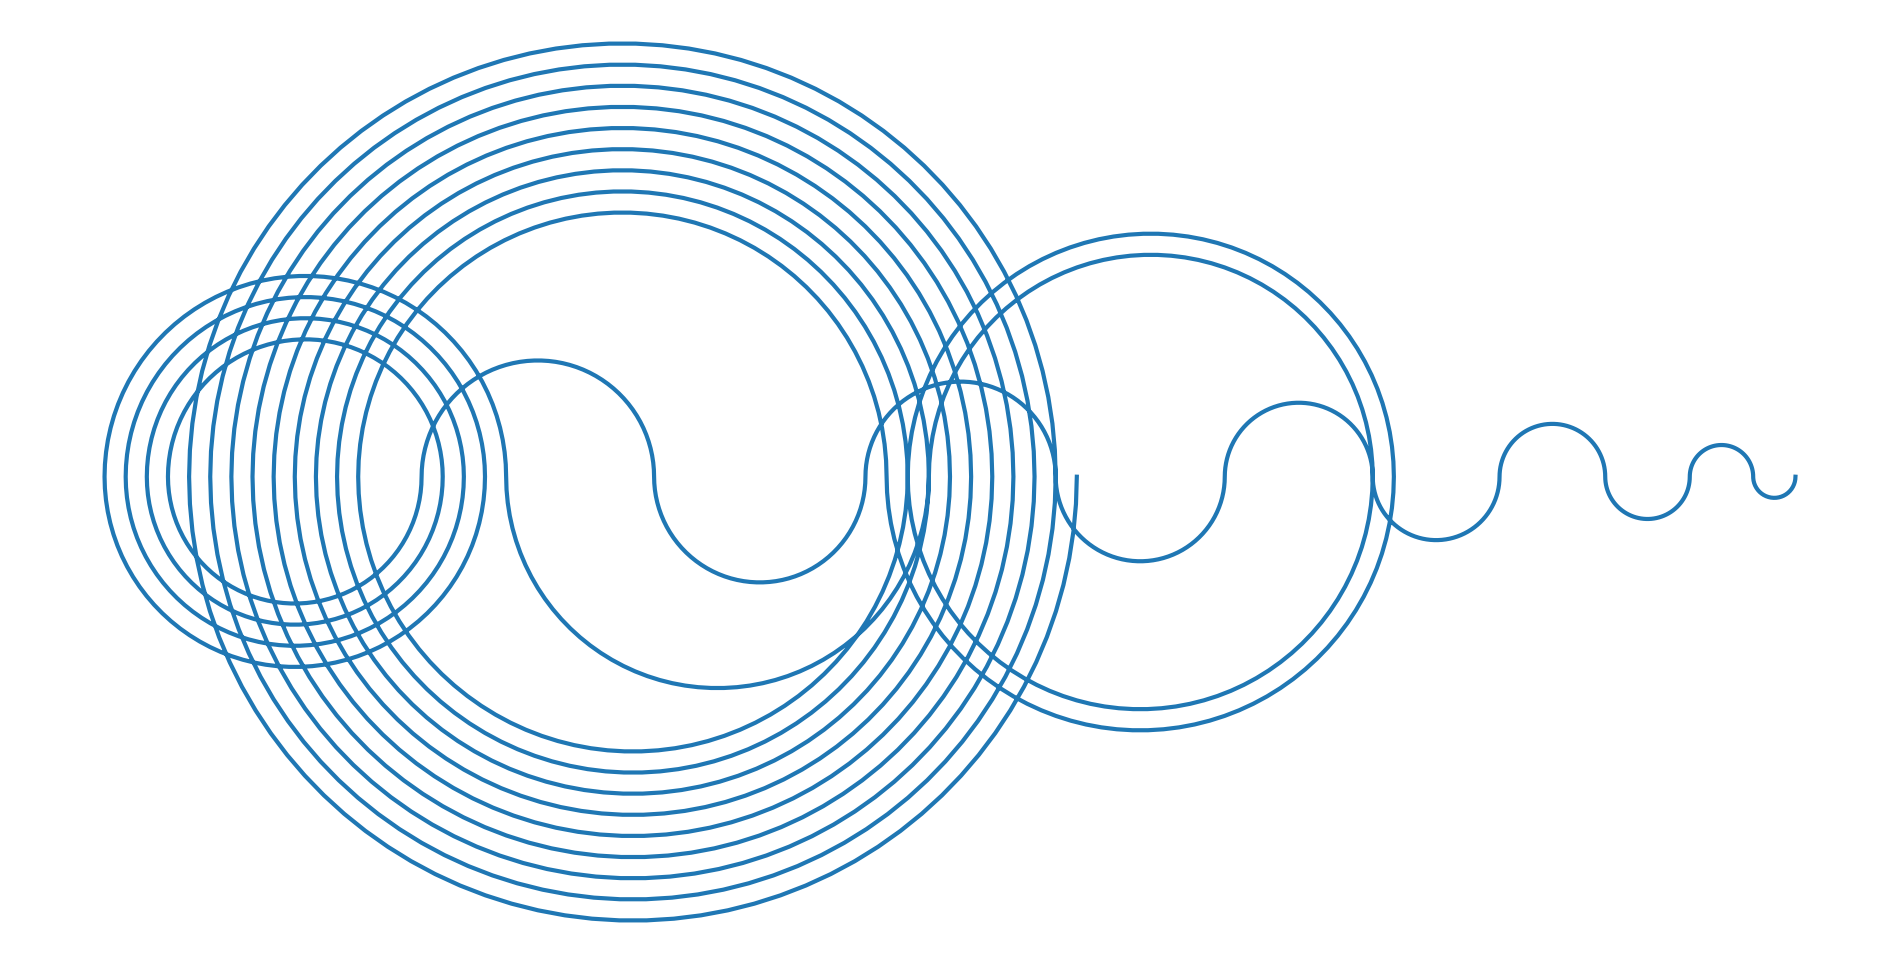

In [44]:
org = 80
# n = draw_recaman(30, orig=org, offset=org, start=1, skip=1, stop_approx=True)
# print(n)
n = draw_recaman(20, orig=org, offset=org, start=2, skip=1, stop_approx=True)
print(n)

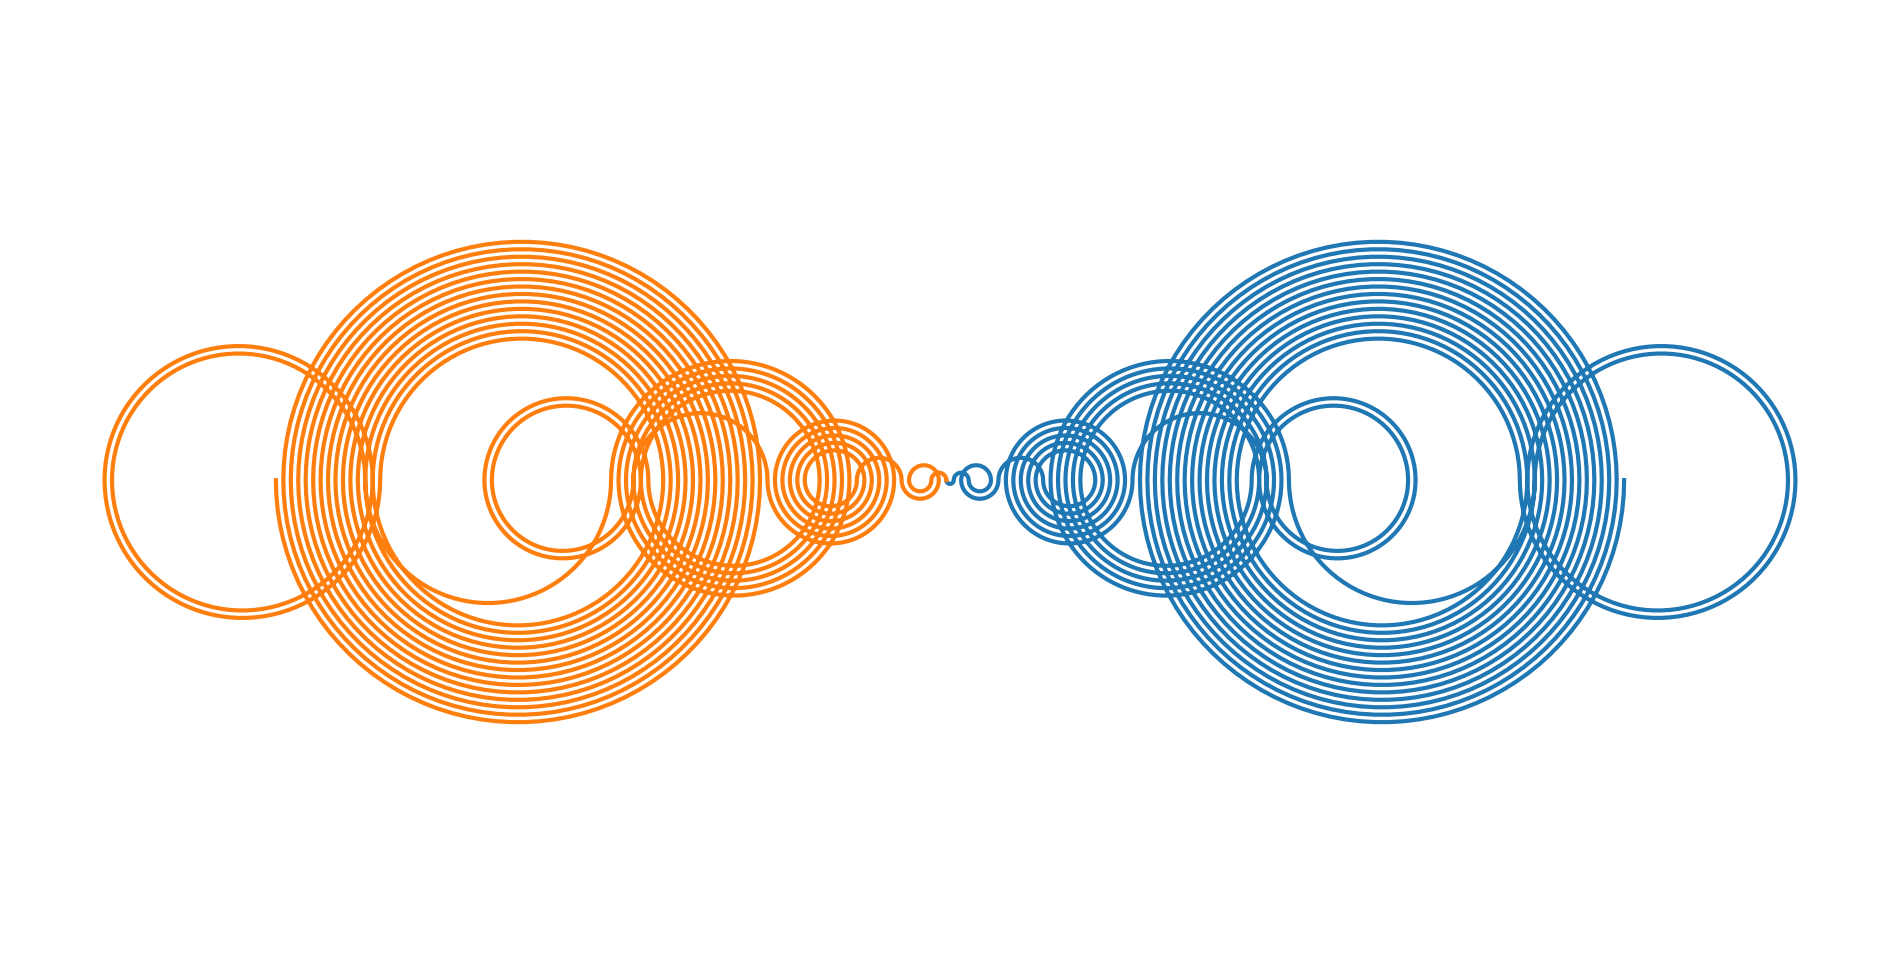

In [45]:
n = draw_recaman(65, orig=0, offset=0, start=1, skip=1, stop_approx=True)
n = draw_recaman(65, orig=0, offset=0, start=2, skip=1, stop_approx=True, scale=-1, new_plot=False)